In [1]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [2]:
x, y = datasets.load_diabetes(return_X_y=True)
raw = x[:, None, 2] #=x[:2]

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

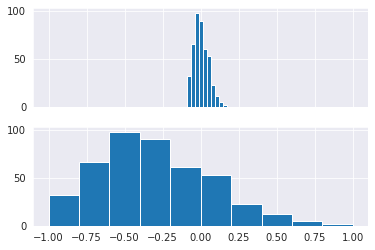

In [15]:
#reglas de escalamiento
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw) / (max_raw - min_raw)

fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].hist(raw)
axs[1].hist(scaled)

In [16]:
#modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(raw, y)

In [19]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)
print(f'train raw: {raw_time}')
print(f'train scaled: {scaled_time}')

train raw: 0.14114773800019975
train scaled: 0.08615842399967732


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

#### TRANSFORMACIONES NO LINEALES

In [20]:
df = pd.read_csv('files/cars.csv')

<AxesSubplot:>

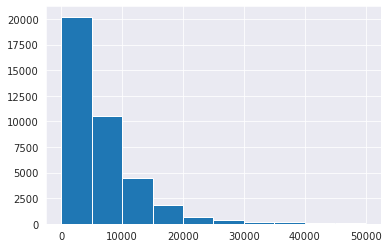

In [21]:
df.price_usd.hist()

<AxesSubplot:>

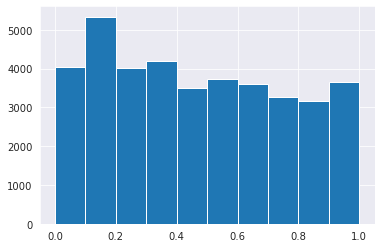

In [27]:
#transformación tanh(x)
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()